In [1]:
print("테스트")

테스트


# Data Load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv("data/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col = "PassengerId")

print(train.shape, test.shape)

(891, 11) (418, 10)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

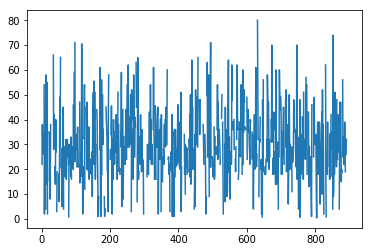

In [19]:
plt.plot(train["Age"])

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

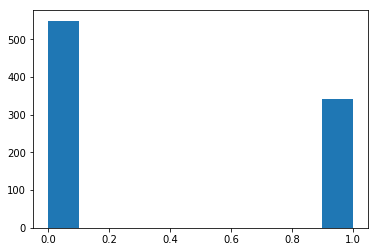

In [21]:
plt.hist(train["Survived"])

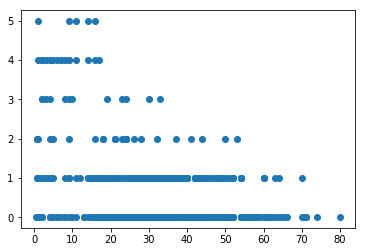

In [15]:
plt.scatter(train["Age"], train["SibSp"])

# Feature Engineering

## (1) NaN체크

In [161]:
train.info() #Age, Cabin, Embarked + Fare

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [162]:
test.info() #Age, Fare, Cabin + Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [163]:
train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull(), "Age_encode"] = train["Age"].mean()
print("Train의 Age_encode에서 NaN의 개수는", train.loc[train["Age_encode"].isnull()].shape[0],"개")

Train의 Age_encode에서 NaN의 개수는 0 개


In [164]:
test["Age_encode"] = test["Age"]
test.loc[test["Age"].isnull(), "Age_encode"] = test["Age"].mean()
print("Test의 Age_encode에서 NaN의 개수는", test.loc[test["Age_encode"].isnull()].shape[0],"개")

Test의 Age_encode에서 NaN의 개수는 0 개


- Cabin은 보류

In [165]:
train["Fare_encode"] = train["Fare"]  #train에는 NaN이 없으므로, 변수명만 통일

test["Fare_encode"] = test["Fare"]
test.loc[test["Fare"].isnull(), "Fare_encode"] = test["Fare"].mean()
print("Test의 Fare_encode에서 NaN의 개수는", test.loc[test["Fare_encode"].isnull()].shape[0],"개")

Test의 Fare_encode에서 NaN의 개수는 0 개


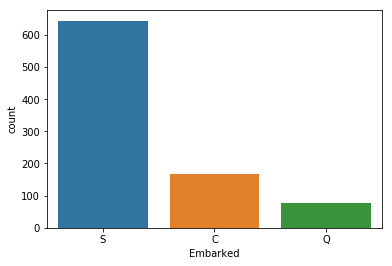

In [166]:
sns.countplot(data = train, x = "Embarked")

In [167]:
test["Embarked_encode"] = test["Embarked"] #test에는 NaN이 없으므로 변수명만 통일

train["Embarked_encode"] = train["Embarked"]
train.loc[train["Embarked"].isnull(), "Embarked_encode"] = "S"
print("train의 Embarked_encode에서 NaN의 개수는", train.loc[train["Embarked_encode"].isnull()].shape[0],"개")

train의 Embarked_encode에서 NaN의 개수는 0 개


## (2) Name 추출

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Age_encode, Fare_encode, Embarked_encode, Name_encode]
Index: []

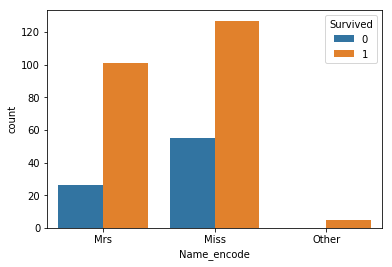

In [168]:
train["Name_encode"] = "Other" 
train.loc[train["Name"].str.contains("Mr"), "Name_encode"] = "Mr" #include가 아니라 Contains임
train.loc[train["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs" 
train.loc[train["Name"].str.contains("Master"), "Name_encode"] = "Master" 
train.loc[train["Name"].str.contains("Miss"), "Name_encode"] = "Miss" 

train[["Name", "Name_encode"]].head()

train[["Name","Name_encode", "Sex", "SibSp", "Parch"]].loc[train["Name_encode"] == "Other"]
train_female = train.loc[train["Sex"] == "female"]
sns.countplot(data = train_female, x = "Name_encode", hue = "Survived")

train.loc[(train["Sex"] == "female") & (train["Name_encode"] == "Other"), "Name_encode"] = "Miss"
train.loc[(train["Sex"] == "male") & (train["Name_encode"] == "Other"), "Name_encode"] = "Mr"
train.loc[train["Name_encode"] == "Other"]

In [169]:
test["Name_encode"] = "Other" 
test.loc[test["Name"].str.contains("Mr"), "Name_encode"] = "Mr" #include가 아니라 Contains임
test.loc[test["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs" 
test.loc[test["Name"].str.contains("Master"), "Name_encode"] = "Master" 
test.loc[test["Name"].str.contains("Miss"), "Name_encode"] = "Miss" 

test[["Name", "Name_encode"]].head()

test[["Name","Name_encode", "Sex", "SibSp", "Parch"]].loc[test["Name_encode"] == "Other"]
test_female = test.loc[test["Sex"] == "female"]

test.loc[(test["Sex"] == "female") & (test["Name_encode"] == "Other"), "Name_encode"] = "Miss"
test.loc[(test["Sex"] == "male") & (test["Name_encode"] == "Other"), "Name_encode"] = "Mr"
test.loc[test["Name_encode"] == "Other"]

Empty DataFrame
Columns: [Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Age_encode, Fare_encode, Embarked_encode, Name_encode]
Index: []

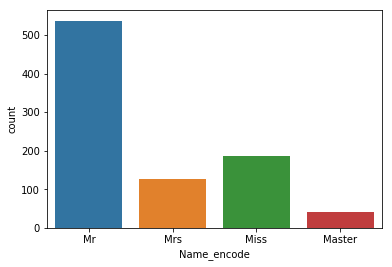

In [170]:
sns.countplot(data = train, x = "Name_encode")

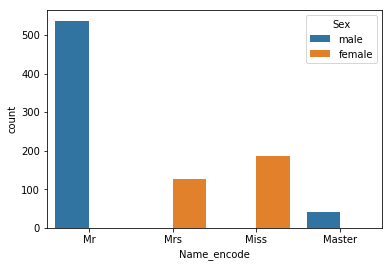

In [171]:
sns.countplot(data = train, x = "Name_encode", hue = "Sex")

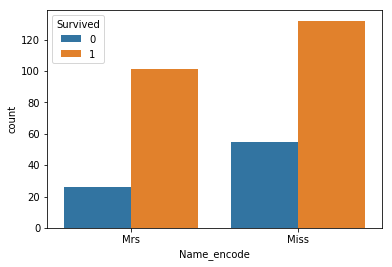

In [172]:
train_female = train.loc[train["Sex"] == "female"]
sns.countplot(data = train_female, x = "Name_encode", hue = "Survived")

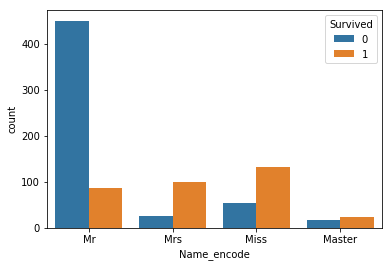

In [173]:
sns.countplot(data = train, x = "Name_encode", hue = "Survived")

## (3) One-hot Encoding

In [174]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

             Age_encode  Fare_encode Embarked_encode Name_encode  
PassengerId                                                       
1                  22.0       7.2500               S          Mr  
2                  38.0      71.2833               C         Mrs  
3                  26.0       7.9250               S        Miss  
4                  35.0      53.1000               S         Mrs  
5                  35.0       8.0500               S          Mr

In [175]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age_encode', 'Fare_encode',
       'Embarked_encode', 'Name_encode'],
      dtype='object')

In [176]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_encode", "Name_encode", "Pclass"]

train_dummy = dummy_data(train, dummy_columns)
test_dummy = dummy_data(test, dummy_columns)

print("train:", train.shape, train_dummy.shape)
print("test:", test.shape, test_dummy.shape)

train = train_dummy
test = test_dummy

train: (891, 15) (891, 27)
test: (418, 14) (418, 26)


In [177]:
train = train_dummy
test = test_dummy

In [178]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin    ...     \
PassengerId                                                   ...      
1                1      0         A/5 21171   7.2500   NaN    ...      
2                1      0          PC 17599  71.2833   C85    ...      
3                0      0  STON/O2. 3101282   7.9250   NaN    ...      
4                1      0            113803  53.1000  C123    ...      
5                0      0            373450   8.0500   NaN    ...      

            Embarked_encode_C  Embarked_encode_Q  Embarked_encode_S  \
PassengerId                                                           
1                           0                  0                  1   
2                           1                  0                  0   
3                           0                  0                  1   
4                           0                  0                  1   
5                           0                  0                  1   

            Name_encode_Master Name_encode_Miss  Name_encode_Mr  \
PassengerId                                                       
1                            0                0               1   
2                            0                0               0   
3                            0                1               0   
4                            0                0               0   
5                            0                0               1   

             Name_encode_Mrs  Pclass_1  Pclass_2  Pclass_3  
PassengerId                                                 
1                          0         0         0         1  
2                          1         1         0         0  
3                          0         0         0         1  
4                          1         1         0         0  
5                          0         0         0         1  

[5 rows x 27 columns]

# Family 구별

In [179]:
train["familysize"] = train["SibSp"] + train["Parch"]

In [180]:
train["familysize"].value_counts() #value_count가 아니라 s가 붙음

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: familysize, dtype: int64

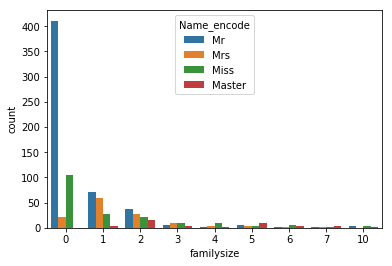

In [182]:
sns.countplot(data = train, x = "familysize", hue = "Name_encode")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'survived')]

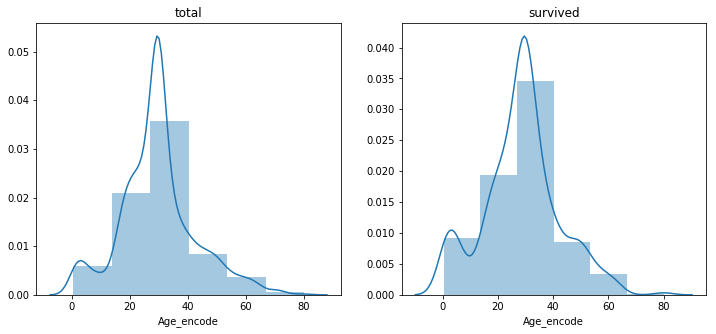

In [196]:
#train.loc[(train["Age_encode"] > 15) & (train["Survived"] == 1)]
train_survived = train.loc[train["Survived"] == 1]

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)

sns.distplot(train["Age_encode"], bins = 6, ax = ax1)
ax1.set(title = "total")
sns.distplot(train_survived["Age_encode"], bins = 6, ax = ax2)
ax2.set(title = "survived")

In [239]:
train["Age_encode"].quantile(0.8)

38.0

In [206]:
train.shape[0]

891

In [209]:
(train.loc[train["Survived"] == 1].shape[0])/(train.shape[0])

0.3838383838383838

In [236]:
for i in range(5):
    train_survived = train.loc[train["Survived"] == 1]
    train_sect = train["Age_encode"].quantile((i+1)/5)
    train_sect1 = train["Age_encode"].quantile((i)/5)
    
    if i == 4:
        train_num = train.loc[train["Age_encode"] > train_sect1]
        train_survived_num = train_survived.loc[train["Age_encode"] > train_sect1]
        train_percent = train_survived_num.shape[0] / train_num.shape[0]
        print(f"{i}, {train_num.shape[0]}, {train_sect: .1f}, {train_sect1: .1f}, {train_percent:.0%}")
    elif i == 0:
        train_num = train.loc[train["Age_encode"] <= train_sect]
        train_survived_num = train_survived.loc[train["Age_encode"] > train_sect]
        train_percent = train_survived_num.shape[0] / train_num.shape[0]
        print(f"{i}, {train_num.shape[0]}, {train_sect: .1f}, {train_sect1: .1f}, {train_percent:.0%}")
    else:
        train_num = train.loc[(train["Age_encode"] <= train_sect) & (train["Age_encode"] > train_sect1)]
        train_survived_num = train_survived.loc[(train["Age_encode"] <= train_sect) & (train["Age_encode"] > train_sect1)]
        train_percent = train_survived_num.shape[0] / train_num.shape[0]
        print(f"{i}, {train_num.shape[0]}, {train_sect: .1f}, {train_sect1: .1f}, {train_percent:.0%}")

0, 179,  20.0,  0.4, 145%
1, 183,  28.0,  20.0, 36%
2, 199,  29.7,  28.0, 30%
3, 153,  38.0,  29.7, 44%
4, 177,  80.0,  38.0, 37%


In [ ]:
train.loc[train["familysize"] == 0, "family_encode"] = "alone"